In [1]:
%config Completer.use_jedi = False

In [23]:
from sklearn.preprocessing import Binarizer
import numpy as np

In [3]:
X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

In [4]:
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [17]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('confusion matrix')
    print(confusion)
    print('accuracy : {0:.4f}, precision : {1:.4f}, recall : {2:.4f}'.format(accuracy, precision, recall))

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('inputs/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [11]:
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [13]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


In [14]:
X_titanic_df = transform_features(X_titanic_df)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state=1)

In [18]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

confusion matrix
[[94 12]
 [24 49]]
accuracy : 0.7989, precision : 0.8033, recall : 0.6712


/Users/sanghyub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() result Shape : {0}'.format(pred_proba.shape))
print('Get 3samples from pred_proba array \n:', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('predict the class which got higher probability \n', pred_proba_result[:3])

pred_proba() result Shape : (179, 2)
Get 3samples from pred_proba array 
: [[0.15745522 0.84254478]
 [0.89114946 0.10885054]
 [0.18827598 0.81172402]]
predict the class which got higher probability 
 [[0.15745522 0.84254478 1.        ]
 [0.89114946 0.10885054 0.        ]
 [0.18827598 0.81172402 1.        ]]


In [28]:
pred_proba[:,1].reshape(-1,1).shape

(179, 1)

In [29]:
custom_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)

In [30]:
custom_predict = binarizer.transform(pred_proba_1)

In [31]:
get_clf_eval(y_test,custom_predict)

confusion matrix
[[94 12]
 [24 49]]
accuracy : 0.7989, precision : 0.8033, recall : 0.6712


### threshold를 낮추니 Ture 값이 많아지게 되어 precision값은 감소하고 recall값이 증가하였다.

In [34]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

confusion matrix
[[86 20]
 [18 55]]
accuracy : 0.7877, precision : 0.7333, recall : 0.7534


In [35]:
thresholds = [0.4, 0.45, 0.50, 0.55,0.6]

In [36]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('threshold:',custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

threshold: 0.4
confusion matrix
[[86 20]
 [18 55]]
accuracy : 0.7877, precision : 0.7333, recall : 0.7534
threshold: 0.45
confusion matrix
[[90 16]
 [20 53]]
accuracy : 0.7989, precision : 0.7681, recall : 0.7260
threshold: 0.5
confusion matrix
[[94 12]
 [24 49]]
accuracy : 0.7989, precision : 0.8033, recall : 0.6712
threshold: 0.55
confusion matrix
[[95 11]
 [26 47]]
accuracy : 0.7933, precision : 0.8103, recall : 0.6438
threshold: 0.6
confusion matrix
[[98  8]
 [29 44]]
accuracy : 0.7933, precision : 0.8462, recall : 0.6027


In [37]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('shape of returnes clssification threshold array:', thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0],15)
print('10 indexes for sample extraction:', thr_index)
print(' thresholds for 10 samples:', np.round(thresholds[thr_index],2))

print('precision of each threshold', np.round(precisions[thr_index],3))
print('recall of each threshold', np.round(recalls[thr_index],3))

shape of returnes clssification threshold array: (159,)
10 indexes for sample extraction: [  0  15  30  45  60  75  90 105 120 135 150]
 thresholds for 10 samples: [0.08 0.1  0.12 0.13 0.21 0.31 0.45 0.58 0.65 0.76 0.93]
precision of each threshold [0.435 0.458 0.511 0.543 0.604 0.694 0.771 0.8   0.897 0.917 1.   ]
recall of each threshold [1.    0.959 0.932 0.863 0.836 0.808 0.74  0.603 0.479 0.301 0.123]


###  threshold값이 증가할수록 precision이 올라가고, recall은 낮아지는 것을 확인할 수 있다.

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [55]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.axvline(x=0.45, color='r', linewidth = 0.7)
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall curve')
    plt.legend() ; plt.grid()

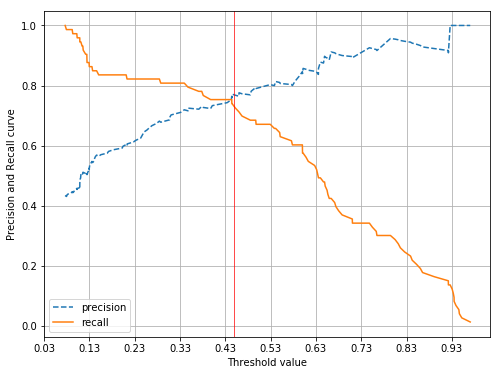

In [56]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [57]:
from sklearn.metrics import f1_score

In [58]:
f1 = f1_score(y_test, pred)
print('F1 score: {0:.4f}'.format(f1))

F1 score: 0.7313


In [62]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    precision = precision_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('confusion matrix')
    print(confusion)
    
    print('Accuracy : {0:.4f}, Precision : {1:.4f}, Recall : {2:.4f}, F1-score : {3:.4f}'.format(accuracy, precision, recall, f1))

In [63]:
thresholds = [0.4, 0.55, 0.55,0.6]

### 0.6이 가장 좋은 값으로 보인다.

In [64]:
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

threshold: 0.4
confusion matrix
[[86 20]
 [18 55]]
Accuracy : 0.7877, Precision : 0.7333, Recall : 0.7534, F1-score : 0.7432
threshold: 0.55
confusion matrix
[[95 11]
 [26 47]]
Accuracy : 0.7933, Precision : 0.8103, Recall : 0.6438, F1-score : 0.7176
threshold: 0.55
confusion matrix
[[95 11]
 [26 47]]
Accuracy : 0.7933, Precision : 0.8103, Recall : 0.6438, F1-score : 0.7176
threshold: 0.6
confusion matrix
[[98  8]
 [29 44]]
Accuracy : 0.7933, Precision : 0.8462, Recall : 0.6027, F1-score : 0.7040


In [65]:
from sklearn.metrics import roc_auc_score, roc_curve

In [66]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

thr_index = np.arange(0, thresholds.shape[0],5)


In [68]:
fprs

array([0.        , 0.        , 0.        , 0.00943396, 0.00943396,
       0.01886792, 0.01886792, 0.02830189, 0.02830189, 0.03773585,
       0.03773585, 0.04716981, 0.04716981, 0.06603774, 0.06603774,
       0.0754717 , 0.0754717 , 0.10377358, 0.10377358, 0.11320755,
       0.11320755, 0.12264151, 0.12264151, 0.14150943, 0.14150943,
       0.1509434 , 0.1509434 , 0.16037736, 0.16037736, 0.19811321,
       0.19811321, 0.20754717, 0.20754717, 0.21698113, 0.21698113,
       0.26415094, 0.26415094, 0.32075472, 0.33962264, 0.37735849,
       0.37735849, 0.44339623, 0.44339623, 0.49056604, 0.49056604,
       0.54716981, 0.54716981, 0.59433962, 0.59433962, 0.60377358,
       0.60377358, 0.61320755, 0.63207547, 0.63207547, 0.68867925,
       0.71698113, 0.75471698, 0.76415094, 0.76415094, 0.79245283,
       0.79245283, 0.83962264, 0.83962264, 0.89622642, 0.89622642,
       0.98113208, 1.        ])

In [69]:
tprs

array([0.        , 0.01369863, 0.1369863 , 0.1369863 , 0.30136986,
       0.30136986, 0.34246575, 0.34246575, 0.42465753, 0.42465753,
       0.47945205, 0.47945205, 0.49315068, 0.49315068, 0.57534247,
       0.57534247, 0.60273973, 0.60273973, 0.65753425, 0.65753425,
       0.67123288, 0.67123288, 0.68493151, 0.68493151, 0.71232877,
       0.71232877, 0.73972603, 0.73972603, 0.75342466, 0.75342466,
       0.78082192, 0.78082192, 0.79452055, 0.79452055, 0.80821918,
       0.80821918, 0.82191781, 0.82191781, 0.82191781, 0.82191781,
       0.83561644, 0.83561644, 0.84931507, 0.84931507, 0.8630137 ,
       0.8630137 , 0.87671233, 0.87671233, 0.90410959, 0.90410959,
       0.91780822, 0.93150685, 0.93150685, 0.94520548, 0.94520548,
       0.94520548, 0.94520548, 0.94520548, 0.95890411, 0.95890411,
       0.97260274, 0.97260274, 0.98630137, 0.98630137, 1.        ,
       1.        , 1.        ])

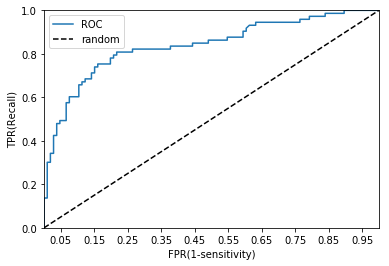

In [72]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    
    plt.plot([0,1], [0,1], 'k--', label='random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end,0.1),2))
    plt.xlim(0,1) ; plt.ylim(0,1)
    plt.xlabel('FPR(1-sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

In [73]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC score {0:.4f}'.format(roc_score))

ROC AUC score 0.7790
